# Нейронная сеть для прогнозирования стоимости недвижимости

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [2]:

data = pd.read_csv("USA_Housing.csv")

X = data.drop(["Price", "Address"], axis=1)
y = data["Price"]


In [3]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:

model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    Dense(1)
])


F:\programms\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:

model.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae"]
)


In [6]:

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1636707205120.0000 - mae: 1229952.7500 - val_loss: 1637481447424.0000 - val_mae: 1227988.7500
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1636088283136.0000 - mae: 1229709.6250 - val_loss: 1635878436864.0000 - val_mae: 1227364.0000
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1631947849728.0000 - mae: 1228111.5000 - val_loss: 1628093284352.0000 - val_mae: 1224406.1250
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1617581047808.0000 - mae: 1222680.7500 - val_loss: 1605657427968.0000 - val_mae: 1216005.1250
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1583188017152.0000 - mae: 1209711.0000 - val_loss: 1557575630848.0000 - val_mae: 1198052.1250
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1517766967296.0000 - mae: 1184842.3750 - val_loss: 1473045987328.0000 - val_mae: 1166059.2500
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 141058637

In [9]:
predictions = model.predict(X_test).flatten()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


C:\Users\Артём Баранов\AppData\Local\Temp\ipykernel_6676\202957839.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions))


<Axes: xlabel='Price', ylabel='Density'>

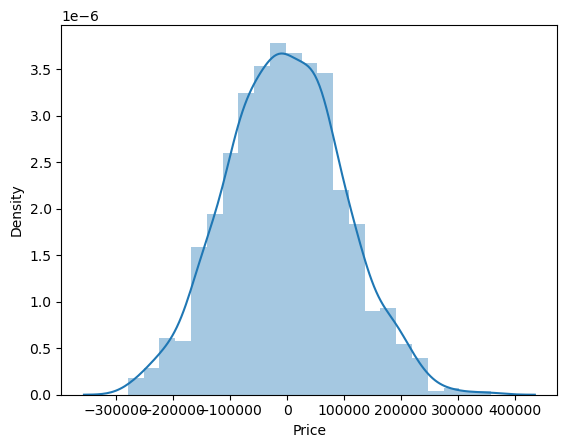

In [10]:
sns.distplot((y_test - predictions))

In [ ]:

y_pred = model.predict(X_test).flatten()

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))


In [ ]:

sample = X_test[0].reshape(1, -1)
predicted_price = model.predict(sample)

print("Прогнозируемая цена:", predicted_price[0][0])
print("Реальная цена:", y_test.iloc[0])
